In [22]:
import math

# for plots
import matplotlib.pyplot as plt
import numpy as np

# for dummy ledgends
from matplotlib.lines import Line2D

# for widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline


In [42]:
# Write functions for position of damped harmonic oscillator

def x(A,k,m,t):
    omega= math.sqrt( k/m )
    x = A* math.cos(omega * t)
    return x

def xdamp(A,b,k,m,t):
    omega= math.sqrt( k/m - b**2/(4*m**2))
    x = A*math.exp(-b/(2*m)*t)* math.cos(omega * t)
    return x

def decay(A,b,k,m,t):
    x = A*math.exp(-b/(2*m)*t)
    return x

In [46]:
# Damped harmonic oscillator
# Write a function to plot position as a function of t
# Create widgets to toggle different values of A,b,k,m

def plot_func(A,b,k,m):

    # continuous position plot
    ts = np.linspace(0,10,1000)
        
    xs_simple = [x(A,k,m,t) for t in ts] 
    xs_damped = [xdamp(A,b,k,m,t) for t in ts] 
    decays_up = [decay(A,b,k,m,t) for t in ts] 
    decays_dw = [-decay(A,b,k,m,t) for t in ts] 

    plt.plot(ts, xs_simple, c="green",lw=1)
    plt.xlabel('t [s]')
    plt.ylabel('x [m]')
    
    plt.plot(ts, xs_damped, c="blue",lw=2)
    plt.plot(ts, decays_up, c="red",lw=1)
    plt.plot(ts, decays_dw, c="red",lw=1)        
    
    #dummy legend
    lines = [Line2D([0], [0], c="green", lw=1),
             Line2D([0], [0], c="blue", lw=2),
             Line2D([0], [0], c="red", lw=2)]

    plt.legend(handles=lines, labels=['x-SHO','x-damped', 'decaying amplitude'])

    plt.show()
    


interact(plot_func, A = widgets.FloatSlider(min=1,max=10,step=1,value=1), 
                    b = widgets.FloatSlider(min=0,max=1,step=0.1,value=0.5),
                    k = widgets.FloatSlider(min=1,max=50,step=1,value=10),
                    m = widgets.FloatSlider(min=1,max=50,step=1,value=1) )

interactive(children=(FloatSlider(value=1.0, description='A', max=10.0, min=1.0, step=1.0), FloatSlider(value=…

<function __main__.plot_func(A, b, k, m)>

In [48]:
# Write functions for position of a driven harmonic oscillator

def Adrive(F,b,k,m,omega): #omega = omega-drive
    a = F / (math.sqrt( (k - m*omega**2)**2 + (b*omega)**2 ))
    return a

def xdrive(F,b,k,m,omega,t):
    a = A(F,k,m,b,omega)
    x = a*math.cos(omega * t)
    return x


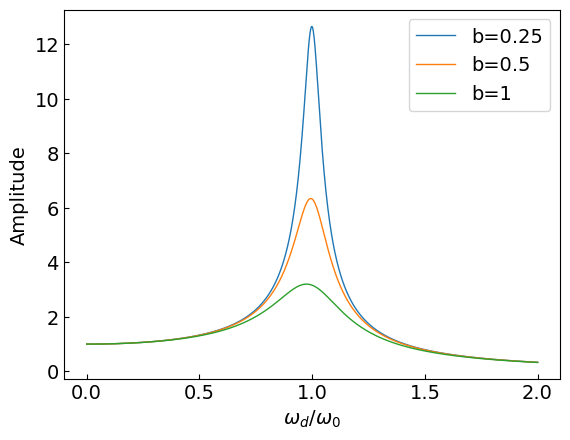

In [71]:
# Driven harmonic oscillator
# Plot representative amplitudes of A for different parameters
F=10
k=10
m=1
omega_0 = math.sqrt(k/m)

# plot A versus omega/omega_0
omegas_norm = np.linspace(0,2,1000)

for b in [0.25,0.5,1]:
    amps = [Adrive(F,b,k,m,omega_0*o) for o in omegas_norm]

    plt.plot(omegas_norm, amps, lw=1, label="b={}".format(b))

plt.xlabel('$\omega_d / \omega_0$')
plt.ylabel('Amplitude')

   
plt.legend()

plt.show()





In [56]:
# Driven harmonic oscillator
# Write a function to plot position as a function of t
# Create widgets to toggle different values of A,b,k,m

def plot_func(F,b,k,m,omega):

    # continuous position plot
    ts = np.linspace(0,10,1000)
    
    a = Adrive(F,b,k,m,omega)
    xs_simple = [x(a,k,m,t) for t in ts] 
    xs_driven = [xdrive(F,b,k,m,omega,t) for t in ts] 

    plt.plot(ts, xs_simple, c="green",lw=1)
    plt.plot(ts, xs_driven, c="blue",lw=2) 
    plt.xlabel('t [s]')
    plt.ylabel('x [m]')
    
       
    #dummy legend
    lines = [Line2D([0], [0], c="green", lw=2),
             Line2D([0], [0], c="red", lw=2)]

    plt.legend(handles=lines, labels=['x-SHO','x-Driven'])

    plt.show()
    


interact(plot_func, F = widgets.FloatSlider(min=1,max=10,step=1,value=1), 
                    b = widgets.FloatSlider(min=0,max=1,step=0.1,value=0.5),
                    k = widgets.FloatSlider(min=1,max=50,step=1,value=10),
                    m = widgets.FloatSlider(min=1,max=50,step=1,value=1),
                    omega = widgets.FloatSlider(min=0.1,max=10,step=0.1,value=1))

interactive(children=(FloatSlider(value=1.0, description='F', max=10.0, min=1.0, step=1.0), FloatSlider(value=…

<function __main__.plot_func(F, b, k, m, omega)>